In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2022)

In [2]:
# Sample Data
# 전체 1000개 데이터, feature 20개, 전체 중 15개의 변수만 의미를 줌
from sklearn.datasets import make_regression

data, label = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)

In [3]:
data.shape, label.shape

((1000, 20), (1000,))

In [4]:
# Data EDA
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

In [5]:
pca_data = pca.fit_transform(data)

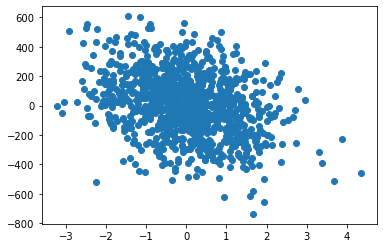

In [6]:
plt.scatter(pca_data, label)

In [7]:
# Data Split
from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(
    data, label, train_size=0.7, random_state=2021
)

In [8]:
# 각 모델의 성능
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR # Support Vector Regressor

In [9]:
# models라는 dictionary에 3개의 모델을 넣음
models = {
    'knn': KNeighborsRegressor(),
    'tree': DecisionTreeRegressor(),
    'svm': SVR(),
}

In [10]:
# MAE로 평가
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [11]:
names = []
results = []
for name, model in models.items():
    result = cross_val_score(model, train_data, train_label, cv=3, scoring="neg_mean_absolute_error")
    names += [name]
    results += [result]

In [23]:
import sklearn
# sklearn.metrics.SCORERS.keys()

In [24]:
results

[array([-105.03162689, -105.83152462, -102.13684464]),
 array([-170.11505601, -156.44424817, -162.26235257]),
 array([-169.94710581, -171.22395842, -162.4710332 ])]

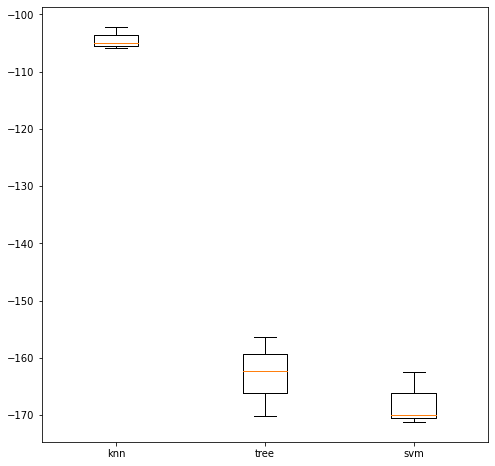

In [25]:
# Boxplot으로 성능 확인
plt.figure(figsize=(8, 8))
plt.boxplot(results, labels=names)
plt.show()

In [26]:
# 각 모델의 개별 성능
# KNN > Tree > SVM
for name, model in models.items():
    model.fit(train_data, train_label)
    test_pred = model.predict(test_data)
    acc = mean_absolute_error(test_label, test_pred)
    print(f"Model {name} test mean absoulte erorr is {acc:.4}")

Model knn test mean absoulte erorr is 97.77
Model tree test mean absoulte erorr is 162.7
Model svm test mean absoulte erorr is 162.6


In [27]:
# Stacking Regression
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

In [28]:
stacking = StackingRegressor(
    estimators=list(models.items()), # Stacking에서 사용할 모델들
    final_estimator=LinearRegression(), # Meta model = Linear Regressor
    cv=3
)

In [29]:
stacking_result = cross_val_score(stacking, train_data, train_label, cv=3, scoring="neg_mean_absolute_error")

In [30]:
stacking_result

array([-93.82983932, -83.51428386, -91.40283689])

In [31]:
all_result = []
all_result.extend(results)
all_result.append(stacking_result)

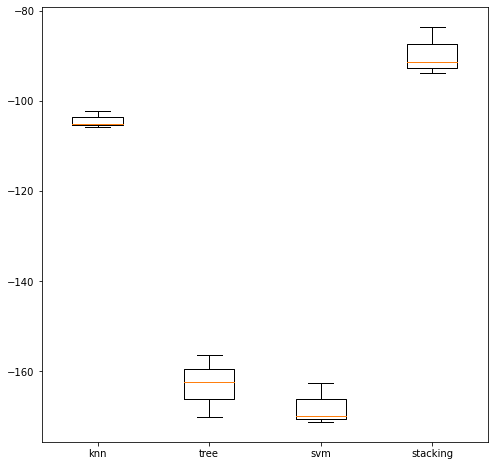

In [32]:
plt.figure(figsize=(8, 8))
plt.boxplot(all_result, labels=names + ["stacking"])
plt.show()

In [33]:
for name, model in models.items():
    test_pred = model.predict(test_data)
    acc = mean_absolute_error(test_label, test_pred)
    print(f"Model {name} test mean absoulte erorr is {acc:.4}")

stacking.fit(train_data, train_label)
stacking_pred = stacking.predict(test_data)
stacking_mae = mean_absolute_error(test_label, stacking_pred)
print(f"Model stacking mean absoulte erorr is {stacking_mae:.4}")

Model knn test mean absoulte erorr is 97.77
Model tree test mean absoulte erorr is 162.7
Model svm test mean absoulte erorr is 162.6
Model stacking mean absoulte erorr is 81.21


In [ ]:
# 개별 모델의 성능보다 Stacking이 더 좋은 성능을 보였다